In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import re

In [339]:
data_folder = "/Users/macintosh/Desktop/EPFL/S3/ADA/MovieSummaries/"

movie_data_unmerged = pd.read_table(data_folder + "movie.metadata.tsv", header=None)

movie_data_unmerged.columns = [
    "Wikipedia_movie_ID",
    "Freebase_movie_ID",
    "Movie_name",
    "Movie_release_date",
    "Movie_box_office_revenue",
    "Movie_runtime",
    "Movie_languages", 
    "Movie_countries",  
    "Movie_genres"     
]


In [340]:
with open(data_folder + "/plot_summaries.txt", "r", encoding="utf-8") as f:
    file = f.readlines()

data = [line.strip().split("\t", 1) for line in file]

summaries_df = pd.DataFrame(data, columns=["Wikipedia_movie_ID", "Movie_Summary"])

summaries_df['Wikipedia_movie_ID'] = summaries_df['Wikipedia_movie_ID'].apply(int)


In [345]:
df_movie = movie_data_unmerged.merge(summaries_df, on="Wikipedia_movie_ID", how='inner')

In [348]:
import json 

df_movie["Movie_genres"] = df_movie["Movie_genres"].apply(lambda x: list(json.loads(x).values()))


In [299]:
small_keywords = ["Biodiversity", "CO2", "Global Warming", "Climate Change", "Greenhouse gases", "Net zero", "methane", "sea level rise", 
            "carbon tax", "pollution", "renewable",
            "air pollution", "pesticides", "fossil fuels", "ipcc", "Greenhouse effect", "Air pollutant",
    "Air pollution", "Natural gas", "Temperature increase", "Carbon dioxide", "Carbon cycle", "Carbon sequestration",
    "Carbon sinks", "Climate feedback", "Climate sensitivity", "Climate system", #"Coal",
    "Coal gasification",
    "Coal liquefaction", "Emissions", "Energy conservation", "Energy intensity", "Global Warming Potential", "Air carrier",
    "Air pollutant",
    "Air pollution", "Antarctic", "activism", "environmental activist", "environmental activists", "environmental", 
    "ecology", "ecosystem", "ecosystems", "environmentalism"]

cont_keywords = ["palestine", "Israel", "ecology", "women rights", "feminism", "Trump", "communism"]



In [293]:
def contains_keywords(summary, keywords):
    return any(re.search(rf"\b{re.escape(keyword.strip())}\b", summary, re.IGNORECASE) for keyword in keywords)
def contains_multiple_keywords(summary, keywords, number = 2):
    a = [re.search(rf"\b{re.escape(keyword.strip())}\b", summary, re.IGNORECASE) for keyword in keywords]
    return len(a) - a.count(None) >= number

In [300]:
df_climate = df_movie[df_movie['Movie_Summary'].apply(lambda x: contains_multiple_keywords(x, small_keywords, number=2))]


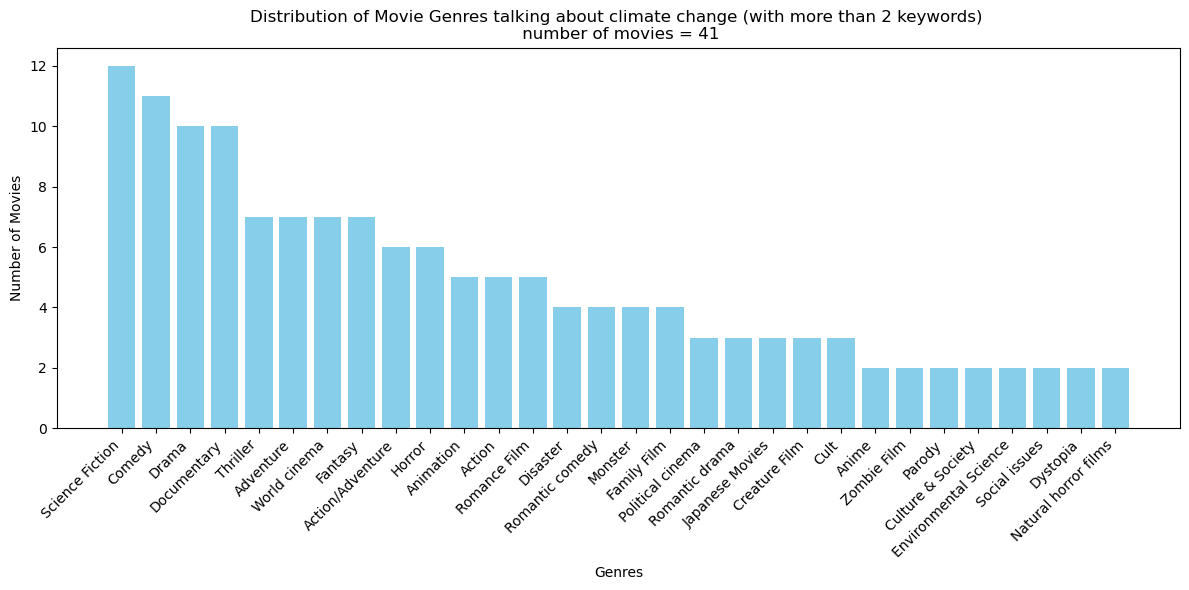

In [304]:
all_genres = [genre for sublist in df_climate['Movie_genres'] for genre in sublist]
genre_counts = Counter(all_genres)
genre_counts = {genre: count for genre, count in genre_counts.items() if count >= 2}
genre_counts = dict(sorted(genre_counts.items(), key=lambda item: item[1], reverse=True))

plt.figure(figsize=(12, 6))
plt.bar(genre_counts.keys(), genre_counts.values(), color='skyblue')
plt.title(f'Distribution of Movie Genres talking about climate change (with more than 2 keywords) \n number of movies = {len(df_climate)}')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [305]:
def find_words(film, keywords):
    summary = df_climate[df_climate['Movie_name'] == film]['Movie_Summary'].values[0]
    return [keyword for keyword in keywords if re.search(rf"\b{re.escape(keyword.strip())}\b", summary, re.IGNORECASE)]

In [307]:
df_climate["Keywords"] = df_climate["Movie_name"].apply(lambda x: find_words(x, small_keywords))
all_keywords = df_climate["Keywords"].values.tolist()
all_keywords = [keyword for sublist in all_keywords for keyword in sublist]
Counter(all_keywords)

/var/folders/4l/yz8mrkq91sl802y_wzywbvnc0000gn/T/ipykernel_44808/750176953.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_climate["Keywords"] = df_climate["Movie_name"].apply(lambda x: find_words(x, small_keywords))


Counter({'environmental': 29,
         'pollution': 16,
         'Global Warming': 8,
         'environmental activist': 8,
         'Climate Change': 4,
         'environmental activists': 4,
         'ecosystems': 4,
         'Antarctic': 2,
         'activism': 2,
         'Emissions': 2,
         'ecosystem': 2,
         'Carbon dioxide': 2,
         'methane': 1,
         'ecology': 1,
         'Carbon cycle': 1,
         'fossil fuels': 1,
         'pesticides': 1,
         'CO2': 1})

In [308]:
df_climate[["Movie_name", "Keywords"]]

,Movie_name,Keywords
556,Solar Attack,"[Global Warming, methane]"
1536,The Age of Stupid,"[Global Warming, Climate Change]"
1908,Fight for the Planet,"[Global Warming, Climate Change]"
2615,Wonderful Days,"[pollution, environmental]"
4760,Airport,"[pollution, environmental]"
12574,Citizen Dog,"[environmental activist, environmental]"
13070,The World According to Monsanto,"[pollution, environmental]"
13604,Severed: Forest of the Dead,"[environmental activists, environmental]"
14996,Heaven Can Wait,"[environmental activist, environmental]"
15564,The Burrowers,"[environmental, ecosystems]"


In [298]:
film_name = "The Story of Joseph and His Brethren"
print(df_climate[df_climate["Movie_name"] == film_name].Movie_Summary.values[0])
find_words(film_name, small_keywords)

Joseph, son of Israel  and Rachel, lived in the land of Canaan with eleven brothers and one sister. He was Rachel's firstborn and Israel's eleventh son. Of all the sons, Joseph was loved by his father the most. Israel even arrayed Joseph with a "long coat of many colors".Another possible translation is "coat with long sleeves" - see "A Dictionary of the Targumim, Talmud Bavli, Talmud Yerushalmi and Midrashic Literature", 1903. ISBN 1-932443-20-7 Israel's favoritism toward Joseph caused his half brothers to hate him, and when Joseph was seventeen years old he had two dreams that made his brothers plot his demise. In the first dream, Joseph and his brothers gathered bundles of grain. Then, all of the grain bundles that had been prepared by the brothers gathered around Joseph's bundle and bowed down to it. In the second dream, the sun , the moon  and eleven stars  bowed down to Joseph himself. When he told these two dreams to his brothers, they despised him for the implications that the f

[]

In [324]:
all_genres = [genre for sublist in df_movie['Movie_genres'] for genre in sublist]
genre_counts = Counter(all_genres)
genre_counts = {genre: count for genre, count in genre_counts.items() if count >= 2}
genre_counts = dict(sorted(genre_counts.items(), key=lambda item: item[1], reverse=True))
genre_counts.keys()

dict_keys(['Drama', 'Comedy', 'Romance Film', 'Thriller', 'Action', 'World cinema', 'Crime Fiction', 'Horror', 'Black-and-white', 'Indie', 'Action/Adventure', 'Adventure', 'Family Film', 'Short Film', 'Romantic drama', 'Animation', 'Musical', 'Science Fiction', 'Mystery', 'Romantic comedy', 'Fantasy', 'Comedy film', 'Crime Thriller', 'War film', 'Period piece', 'Japanese Movies', 'Comedy-drama', 'Film adaptation', 'Documentary', 'Silent film', 'Psychological thriller', 'Bollywood', 'Western', 'Chinese Movies', 'Black comedy', 'LGBT', 'Teen', 'Parody', 'Family Drama', "Children's/Family", 'Coming of age', 'Martial Arts Film', 'Cult', 'Sports', 'Television movie', 'Slasher', 'Suspense', 'Biographical film', 'Biography', 'Supernatural', 'Satire', 'Political drama', 'Film noir', 'Slapstick', 'Melodrama', "Children's", 'Action Thrillers', 'Crime Drama', 'B-movie', 'Costume drama', 'Biopic [feature]', 'History', 'Music', 'Art film', 'Ensemble Film', 'Creature Film', 'Spy', 'Gangster Film', '

In [334]:
genre_counts["Documentary"]

1213

In [335]:
genre_counts, Documentary, Disaster

{'Drama': 19135,
 'Comedy': 10468,
 'Romance Film': 6666,
 'Thriller': 6530,
 'Action': 5869,
 'World cinema': 5153,
 'Crime Fiction': 4277,
 'Horror': 4083,
 'Black-and-white': 3731,
 'Indie': 3668,
 'Action/Adventure': 3553,
 'Adventure': 3248,
 'Family Film': 3219,
 'Short Film': 3192,
 'Romantic drama': 2572,
 'Animation': 2441,
 'Musical': 2414,
 'Science Fiction': 2339,
 'Mystery': 2120,
 'Romantic comedy': 2075,
 'Fantasy': 2012,
 'Comedy film': 1779,
 'Crime Thriller': 1682,
 'War film': 1556,
 'Period piece': 1321,
 'Japanese Movies': 1290,
 'Comedy-drama': 1261,
 'Film adaptation': 1225,
 'Documentary': 1213,
 'Silent film': 1199,
 'Psychological thriller': 1138,
 'Bollywood': 1058,
 'Western': 1022,
 'Chinese Movies': 998,
 'Black comedy': 834,
 'LGBT': 825,
 'Teen': 824,
 'Parody': 767,
 'Family Drama': 766,
 "Children's/Family": 759,
 'Coming of age': 741,
 'Martial Arts Film': 706,
 'Cult': 681,
 'Sports': 672,
 'Television movie': 665,
 'Slasher': 655,
 'Suspense': 651,


In [355]:
df_movie[df_movie["Movie_genres"].apply(lambda x: "Hardcore pornography" in x)]

,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres,Movie_Summary
647,3477618,/m/09fl_w,Once Upon a Girl,1976-06-20,NaN,80.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","[Hardcore pornography, Animation, Adult, Comed...",A lewd old lady claiming to be Mother Goose ha...
1517,7287758,/m/0kv3wx,Destricted,2006,NaN,116.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America"", ""/m/...","[LGBT, Indie, Adult, Experimental film, Short ...",Destricted can be described as seven short art...
2684,383455,/m/021x74,The Devil in Miss Jones,1973,15000000.0,62.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","[Hardcore pornography, Sexploitation, Adult, P...","Georgina Spelvin plays Justine Jones, a lonely..."
11543,142262,/m/011xpf,Debbie Does Dallas,1978,NaN,90.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","[Hardcore pornography, Adult, Pornographic movie]",Debbie Benton is the captain of her high scho...
11936,382510,/m/021sjt,Behind the Green Door,1972,50000000.0,72.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","[Hardcore pornography, Adult, Pornographic movie]",Chambers plays the role of Gloria. Gloria is t...
12630,7976935,/m/026m4h2,Thundercrack!,1975,NaN,158.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","[LGBT, Black comedy, Adult, Hardcore pornograp...",The story begins during a thunderstorm. The ho...
31735,14076874,/m/03csv4h,Kansas City Trucking Co.,1976,NaN,67.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","[Adult, Pornographic movie, Gay pornography, G...","Hank , a trucker, turns out new hire Joe on a ..."


In [360]:
df_movie[df_movie["Movie_name"] == "Once Upon a Girl"]["Movie_Summary"].values

array(['A lewd old lady claiming to be Mother Goose has been put on trial for obscenity, and the evidence being presented is a collection of pornographic animated shorts. Little Red Riding Hood, Jack of Jack and the Beanstalk fame, Cinderella and Snow White are among the most notable participants in what becomes an all out fairy tale orgy.'],
      dtype=object)